In [67]:
import requests
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt

In [68]:
def concatenate_csv_files(folder_path):
    all_dataframes = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            all_dataframes.append(df)
    
    concatenated_df = pd.concat(all_dataframes, ignore_index=True)
    return concatenated_df

## Comparison With Basis Cash

Get a dataframe of all transactions that occurred from Jan 8, 2021 to Jan 18, 2021 for Basis Cash. This was the time when the depeg occurred and Basis Cash was unable to recover.

In [70]:
folder = "./BAC Transfers"  # Replace with your folder path
df = concatenate_csv_files(folder)
df['Block'].nunique()
df['Amount'] = df['Amount'].str.replace(',', '')
df['Amount'] = pd.to_numeric(df['Amount'])
df['day'] = df['Date Time (UTC)'].str[8:10].astype(int)
df['month'] = df['Date Time (UTC)'].str[5:7].astype(int)
df = df.sort_values(by=['day'])
df

,Transaction Hash,Status,Type,Method,Block,Date Time (UTC),From,From_NameTag,To,To_NameTag,Amount,Value (USD),Asset,Txn Fee,day,month
3211,0x1105122b327d1c1ecdde1bafc7aae6507671405c38a6...,Success,ERC-20,Swap Exact ETH For Tokens,11614396,2021-01-08 13:37:55,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,0x44Acd0Ff3bE9Fdfb932453C82B5dF5739D28b276,,6436.656395,$10.73,BAC(BAC),0.035034,8,1
3193,0x3c0c1e1b4c7dbafd13efa539c8c5a15c7ee9fa24b511...,Success,ERC-20,Swap Exact Tokens For Tokens,11614480,2021-01-08 13:57:00,0xd4f8a1bbee54c1533cf0ef8c6f877ada4dadca1b,jinwd.eth,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,4498.539827,$7.50,BAC(BAC),0.025883,8,1
3192,0xb59346961bbe95dd32ad8a4174fff3f1aa44d676aef3...,Success,ERC-20,Add Liquidity,11614482,2021-01-08 13:57:35,0x6bf0443aE7288a126C7a798572ad43Ae78C62b6F,,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,23944.493878,$39.92,BAC(BAC),0.023575,8,1
3191,0xabe2b9345efb582d32c6a686121e90b1b1400cc2c235...,Success,ERC-20,Swap Exact Tokens For Tokens,11614483,2021-01-08 13:57:43,0xE388bE45Ea5Acf7443592948F59f3dA9eE840E52,,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,36059.585245,$60.12,BAC(BAC),0.012166,8,1
3190,0xc572da3b6dc84df4b7e5a1738036b80cf254b7337f2f...,Success,ERC-20,Swap Exact Tokens For Tokens,11614483,2021-01-08 13:57:43,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,0x2F92Dd1c3c25Dd02eBA81b9aC1D3C46400f2230F,,5204.015341,$8.68,BAC(BAC),0.017315,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,0x27f1b6fa46eed27fc12f05b11aebdc39b60234523c93...,Success,ERC-20,Swap Exact Tokens For Tokens,11676353,2021-01-18 1:48:24,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,0x4560ebb130f87ce8a3c0cb7285def7a520bfc018,wweb3.eth,2141.909121,$3.57,BAC(BAC),0.005479,18,1
719,0x26302b8aa3135d78f2712d959b7ae3fe0843c065de50...,Success,ERC-20,0x3a57af38,11676362,2021-01-18 1:50:10,0xe088fb588d2c06b4cedce88d97c18e577e0e3dea,Uniswap V2: BAC-Mars,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,2817.699923,$4.70,BAC(BAC),0.021566,18,1
718,0x96e38eab0f1cb9e0293761ac5bb238e0a5bdb7b052ff...,Success,ERC-20,Swap Tokens For Exact Tokens,11676381,2021-01-18 1:53:31,0x06c05D0214Ab6d293D4Ece9b7fcE7c5cF3856892,,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,7557.670173,$12.60,BAC(BAC),0.018620,18,1
716,0xc4a08038c3f0027c0abfe367f658b5ac2d64934235e8...,Success,ERC-20,Swap Exact Tokens For Tokens,11676387,2021-01-18 1:55:03,0x09be9ab0eb61327d26904bae69efdc6633d5eec8,milkbutcher.eth,0xd4405f0704621dbe9d4dea60e128e0c3b26bddbd,Uniswap V2: BAC-DAI,30000.000000,$50.00,BAC(BAC),0.004986,18,1


Get the day of each transaction and the transaction amount.

In [72]:
transactions = df[['day', 'Amount']].sort_values(by = ['day'])
transactions

,day,Amount
3211,8,6436.656395
9177,8,91.324145
9176,8,50979.533128
9175,8,1543.077343
9174,8,625.084827
...,...,...
6036,18,55483.715337
6037,18,574.871451
6038,18,55485.095694
6055,18,66326.708405


Get the price of Basis Cash on each day

In [77]:
prices = pd.read_csv('bac-usd-max.csv')
prices['month'] = prices['snapped_at'].str[5:7].astype(int)
prices['day'] = prices['snapped_at'].str[8:10].astype(int)
prices['year'] = prices['snapped_at'].str[0:4].astype(int)
prices = prices[prices['month'] == 1]
prices = prices[prices['year'] == 2021]
prices = prices[(prices['day'] >= 8) & (prices['day'] <= 18)]
prices = prices[['day', 'price']]
prices

,day,price
39,8,0.995630
40,9,0.875197
41,10,0.880279
42,11,0.870669
43,12,0.724765
44,13,0.755624
45,14,0.838819
46,15,0.900027
47,16,0.843679
48,17,0.746980


Obtained the total supply of basis cash on each day from etherscan.

In [58]:
#Jan 8, 2021 to Jan 18, 2021 supplies for basis cash
supplies_basis = [
85120197.197678980428723026,
64432188.689977877935469257,
61899676.386977877935469257,
61789381.007977877935469257,
61419302.745977877935469257,
61326688.712977877935469257,
61314996.033977877935469257,
61312100.084977877935469257,
61312100.084977877935469257,
61312100.084977877935469257,
61312100.084977877935469257,
]
supplies_basis

[85120197.19767898,
 64432188.68997788,
 61899676.38697788,
 61789381.00797788,
 61419302.74597788,
 61326688.71297788,
 61314996.03397788,
 61312100.08497788,
 61312100.08497788,
 61312100.08497788,
 61312100.08497788]

Obtained the total supply of basis bonds on each day from etherscan

In [63]:
# Basis bond supplies from jan 8 to jan 18 2021
bond_supplies_basis = [
4864677.002696151625832751,
34759967.369810053015255691,
37665775.575794274333252528,
37807986.32750924880049198,
38320544.053049135506206476,
38432272.247365204750774165,
38446182.422907559743523843,
38449434.403917323852613117,
38449434.403917323852613117,
38449434.403917323852613117,
38449434.403917323852613117
]

Simulated results of the total supply of improved stablecoin on each day by playing back basis cash transactions with the improved stablecoin instead.

In [59]:
#Jan 6, 2021 to Jan 30, 2021 supplies for new stablecoin cash
supplies = [
85123969.067612940197407694,
84892669.857427112322538373,
67249698.377024272285284295,
64639796.106518674822138937,
62464723.999693715070888088,
58218865.330298229771453565,
55228686.730918503165567044,
41608147.804783343137842546,
37615783.589624921063157343,
34953031.042611951004780352,
31810009.055968734473196859,
]
supplies

[85123969.06761295,
 84892669.8574271,
 67249698.37702428,
 64639796.10651868,
 62464723.999693714,
 58218865.33029823,
 55228686.730918504,
 41608147.804783344,
 37615783.58962492,
 34953031.04261195,
 31810009.055968735]

Simulated results of the total supply of improved stablecoin's bonds on each day by playing back basis cash transactions with the improved stablecoin instead.

In [64]:
bond_supplies = [
28.253542261566621751,
232365.984513336505536682,
20391214.317338733608525916,
23356167.217939447322657512,
25855146.199808308202880457,
31699292.882006190660460437,
35656056.599785470567110721,
51893815.019617881061241684,
56329700.491390926508769214,
59487311.405247736828305750,
63694968.007319395621959804
]

Combine the tranaction amount data with the price of the basis cash stablecoin on each day.

In [75]:
merged_df = transactions.merge(prices, on='day', how='inner')
merged_df.to_csv('transactions.csv')
merged_df

,day,Amount,price
0,8,6436.656395,0.995630
1,8,91.324145,0.995630
2,8,50979.533128,0.995630
3,8,1543.077343,0.995630
4,8,625.084827,0.995630
...,...,...,...
9574,18,55483.715337,0.666624
9575,18,574.871451,0.666624
9576,18,55485.095694,0.666624
9577,18,66326.708405,0.666624


Graph showing how the price of basis cash changed from Jan 8, 2021 to Jan 18, 2021.

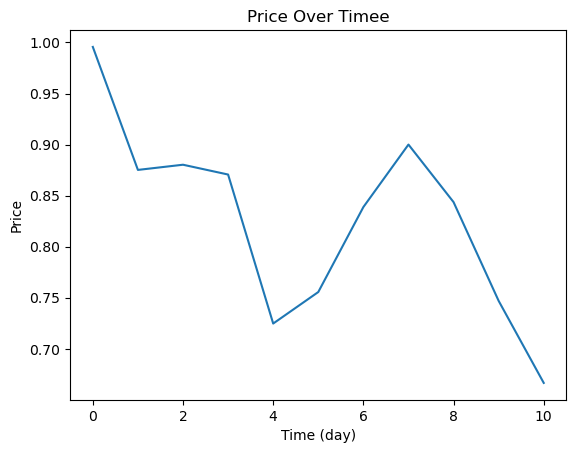

In [78]:
days = [i for i in range(8 - 8, 19 - 8)]
plt.plot(days, prices['price'])
plt.title('Price Over Time')
plt.xlabel('Time (day)')
plt.ylabel('Price')
plt.show()

This graph compares the changes in supply over time for both Basis Cash and our improved stablecoin. For the improved stablecoin, we assume that the price and the transactions on each day are identical to that of Basis Cash, The graph shows that under identical conditions, the improved stablecoin, with its forced bond purchases, better reduces supply when compared to Basis Cash, which only had voluntary bond purchases.

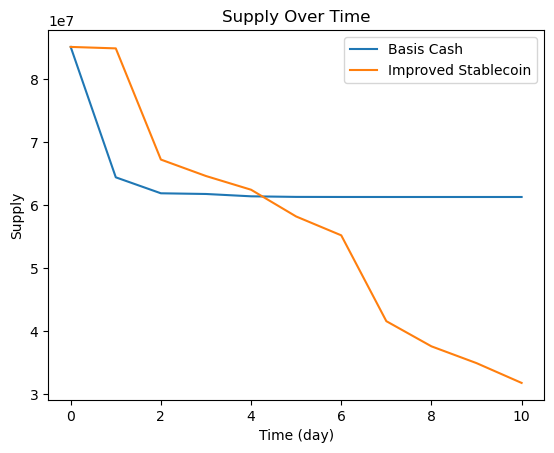

In [79]:
days = [i for i in range(8 - 8, 19 - 8)]
plt.plot(days, supplies_basis, label='Basis Cash')
plt.plot(days, supplies, label='Improved Stablecoin')
plt.title('Supply Over Time')
plt.xlabel('Time (day)')
plt.ylabel('Supply')
plt.legend()
plt.show()

This graph compares the changes in supply over time of the bonds for both Basis Cash and our improved stablecoin. For the improved stablecoin, we assume that the price and the transactions on each day are identical to that of Basis Cash, The graph shows that under identical conditions, the improved stablecoin, with its forced bond purchases, ensures more bonds are purchased.

In [ ]:
days = [i for i in range(8 - 8, 19 - 8)]
plt.plot(days, bond_supplies_basis, label='Basis Bonds')
plt.plot(days, bond_supplies, label='Improved Bonds')
plt.title('Supply Over Time')
plt.xlabel('Time (day)')
plt.ylabel('Supply')
plt.legend()
plt.show()

It is likely that Basis Cash would perform even better if we considered that people can still do voluntary bond purchases with the improved stablecoin, so the number of bonds purchased could be higher than shown. Moreover, the forced bond purchases would deter people from excessive transfers that would reduce the value of the stablecoin, meaning it is unlikely the price of the stablecoin would drop so low in the first place.

## Comparison with Terra USD

In [123]:
# Terra USD Price from May 6, 2022 to May 14, 2022 from etherscan
ust_prices = [
1.00,
0.995,
0.995,
0.799,
0.781,
0.775,
0.37,
0.124,
0.185
]
ust_supplies = [
317629796.024286479448552397,
389294610.010313984635528994,
351055487.231933722808678549,
699534109.733554280965645076,
739149039.924186851310542615,
513699652.540516435621610306,
445622377.356409293782419908,
471586747.462331475710477853,
500072570.139986475710477753
]

diffs = []
for i in range(len(ust_supplies) - 1):
    diffs.append(ust_supplies[i+1] - ust_supplies[i])


In [124]:
supplies = [
321263392.000000000000000000,
391399074.961928469743472657,
329510514.107091251094391174,
513040454.940211271012208521,
278802296.522705447376059729,
35064763.921940142279309012
]

In [111]:
ust_transactions = pd.read_csv('ust_transactions_raw.csv')
ust_transactions['Amount'] = ust_transactions['Amount'].str.replace(',', '')
ust_transactions['Amount'] = pd.to_numeric(ust_transactions['Amount'])
ust_transactions['day'] = ust_transactions['Date Time (UTC)'].str[8:10].astype(int)
ust_transactions['date'] = pd.to_datetime(ust_transactions['Date Time (UTC)'])
ust_transactions['hour'] = ust_transactions['date'].dt.hour
ust_transactions = ust_transactions[['day','Amount', 'hour']]
ust_transactions = ust_transactions.sort_values(by = ['day', 'hour'])

lst = []
for i in range(len(ust_transactions)):
    day = ust_transactions.iloc[i,0]
    hour =  ust_transactions.iloc[i,2]
    p1 = ust_prices[day - 6]
    p2 = ust_prices[day - 5]
    price = ((23 - hour) * p1 + (hour) * p2) / 23
    
    lst.append(price)
    
ust_transactions['price'] = lst
ust_transactions = ust_transactions[['day', 'Amount','price']]
ust_transactions.to_csv('ust_transactions.csv')
ust_transactions.head(100)

,day,Amount,price
86,7,4.987824e+07,0.995000
87,7,4.987824e+07,0.995000
85,7,4.987824e+07,0.995000
84,8,1.998000e+07,0.960913
83,8,1.500000e+07,0.935348
...,...,...,...
3,12,2.000000e+07,0.134696
4,12,2.000000e+07,0.134696
2,13,2.125405e+07,0.158478
1,13,1.942346e+07,0.161130


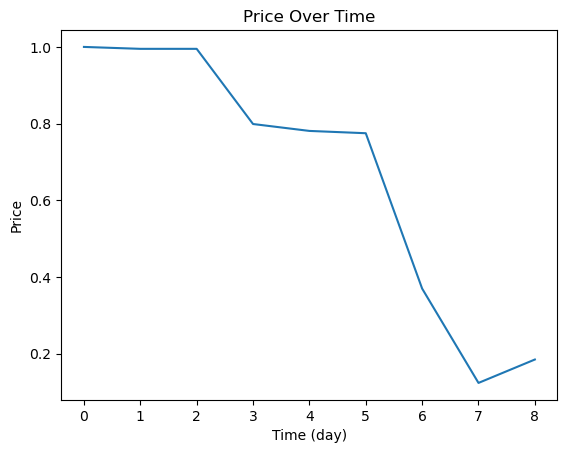

In [121]:
days = [i for i in range(9)]
plt.plot(days, ust_prices)
plt.title('Price Over Time')
plt.xlabel('Time (day)')
plt.ylabel('Price')
plt.show()

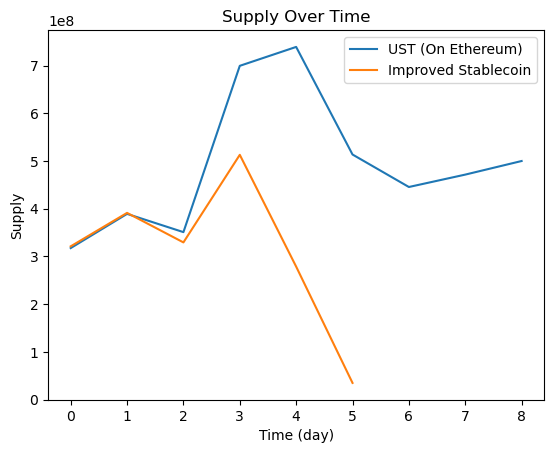

In [127]:
days1 = [i for i in range(9)]
days2 = [i for i in range(6)]
plt.plot(days1, ust_supplies, label='UST (On Ethereum)')
plt.plot(days2, supplies, label='Improved Stablecoin')
plt.title('Supply Over Time')
plt.xlabel('Time (day)')
plt.ylabel('Supply')
plt.legend()
plt.show()

This graph assumes the price changes occur exactly as they did for UST starting from May 7, 2022. It also assumes the same of amount of UST is burned or minted on the Ethereum blockchain. This shows that the sequence of transactions that occurred on UST are impossible with the automated bond mechanism as the the supply will be decreased too much. It is unlikely that this sequence of transactions will happen in the first place because the supply reductions would help prevent the loss of peg in the first place or would prevent people from having enough money to execute the transactions in the first place. Moreover, we see that the supply becomes near zero before the time where UST's price had a steep drop from price 0.8 to 0.4. This shows that our stablecoin is much more responsive to sudden price shifts without intervention. (UST had Terraform labs and other peg defenders working hard to control the price).